# Flights Data Exploration
## by Leqi Lu

## Preliminary Wrangling

This document explores a dataset containing flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# retrieve names of all the csv files 
import os
csv_files = [x for x in os.listdir() if x.endswith('.csv')]
print(csv_files)

['1987.csv', '1988.csv', '1989.csv', '1990.csv', '1991.csv', '1992.csv', '1993.csv', '1994.csv', '1995.csv', '1996.csv', '1997.csv', '1998.csv', '1999.csv', '2000.csv', '2001.csv', '2002.csv', '2003.csv', '2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv']


In [3]:
# function to sample 10000 entries from each year's data  
# and load all the sampled data into flights_sample

def load_data(filenames, flights_sample):
    for filename in filenames:
        print(filename)
        df = pd.read_csv(filename, low_memory=False)
        df_sample = df.sample(10000, random_state=67)
        flights_sample = pd.concat([flights_sample, df_sample], axis=0)
        flights_sample.reset_index(drop=True, inplace=True)
        del df
    return flights_sample

In [4]:
flights_sample_original = pd.DataFrame()
flights_sample_original = load_data(csv_files, flights_sample_original)

1987.csv
1988.csv
1989.csv
1990.csv
1991.csv
1992.csv
1993.csv
1994.csv
1995.csv
1996.csv
1997.csv
1998.csv
1999.csv
2000.csv
2001.csv
2002.csv
2003.csv
2004.csv
2005.csv
2006.csv
2007.csv
2008.csv


In [5]:
# overview of data shape 
print(flights_sample_original.shape)
flights_sample_original.head(10)

(220000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,12,2,3,1945.0,1945,2050.0,2045,NW,976,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,11,23,1,1029.0,1030,1500.0,1527,CO,524,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,12,7,1,702.0,704,934.0,930,UA,360,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,8,4,629.0,630,945.0,948,UA,680,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,26,1,715.0,715,747.0,750,HP,1025,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1987,11,11,3,730.0,719,845.0,828,AA,1003,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1987,11,3,2,1800.0,1800,1934.0,1918,AA,2154,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1987,11,4,3,1234.0,1234,1329.0,1338,EA,554,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1987,10,16,5,1626.0,1628,1653.0,1654,UA,248,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1987,10,5,1,2137.0,2135,2221.0,2220,US,190,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
# descriptive statistics for numeric variables
print(flights_sample_original.describe())

                Year          Month     DayofMonth      DayOfWeek  \
count  220000.000000  220000.000000  220000.000000  220000.000000   
mean     1997.500000       6.709682      15.723418       3.939432   
std         6.344303       3.482753       8.790665       1.988839   
min      1987.000000       1.000000       1.000000       1.000000   
25%      1992.000000       4.000000       8.000000       2.000000   
50%      1997.500000       7.000000      16.000000       4.000000   
75%      2003.000000      10.000000      23.000000       6.000000   
max      2008.000000      12.000000      31.000000       7.000000   

             DepTime     CRSDepTime        ArrTime     CRSArrTime  \
count  215926.000000  220000.000000  215403.000000  220000.000000   
mean     1350.489872    1335.937777    1492.877787    1489.631664   
std       477.584184     477.340890     499.386176     494.750638   
min         1.000000       0.000000       1.000000       0.000000   
25%       934.000000     930.0000

In [7]:
# high-level overview of data composition
flights_sample_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               220000 non-null  int64  
 1   Month              220000 non-null  int64  
 2   DayofMonth         220000 non-null  int64  
 3   DayOfWeek          220000 non-null  int64  
 4   DepTime            215926 non-null  float64
 5   CRSDepTime         220000 non-null  int64  
 6   ArrTime            215403 non-null  float64
 7   CRSArrTime         220000 non-null  int64  
 8   UniqueCarrier      220000 non-null  object 
 9   FlightNum          220000 non-null  int64  
 10  TailNum            139765 non-null  object 
 11  ActualElapsedTime  215398 non-null  float64
 12  CRSElapsedTime     219957 non-null  float64
 13  AirTime            136659 non-null  float64
 14  ArrDelay           215398 non-null  float64
 15  DepDelay           215926 non-null  float64
 16  Or

In [8]:
flights_sample_original.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
93652,1996,1,9,2,912.0,900,1446.0,1500,UA,106,...,2.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
145836,2001,10,17,3,2002.0,2010,2113.0,2124,US,366,...,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
154539,2002,7,24,3,1045.0,950,1250.0,1158,DL,1281,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
183738,2005,6,14,2,1643.0,1638,1916.0,1838,XE,3065,...,17.0,46.0,0,NaN,0,0.0,0.0,38.0,0.0,0.0
42050,1991,5,19,7,2128.0,2125,2224.0,2212,US,1267,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
20101,1989,6,8,4,1555.0,1550,1852.0,1835,DL,525,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
113683,1998,9,26,6,1330.0,1330,1429.0,1430,WN,1087,...,2.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69959,1993,11,15,1,940.0,940,1044.0,1102,NW,719,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
197452,2006,12,26,2,1340.0,1340,1620.0,1635,AA,1129,...,5.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
188157,2005,5,7,6,1205.0,1208,1346.0,1342,DL,923,...,6.0,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [9]:
# dropping less relevant columns
flights_sample_original = flights_sample_original.drop(columns=['FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
                             'Origin', 'Dest', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 
                             'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

### Quality

- ~Erroneous datatypes (DepTime, CRSDepTime, ArrTime, CRSArrTime, ArrDelay, DepDelay)~
- ~Missing information on Deptime, ArrTime, ArrDelay, DepDelay, Distance)~

### Tidiness
- ~DayofMonth does not follow naming convention~

In [59]:
flights_sample = flights_sample_original.copy()

#### DayofMonth does not follow naming convention

##### Define
Change DayofMonth to DayOfMonth

##### Code

In [60]:
flights_sample = flights_sample.rename(columns={'DayofMonth': 'DayOfMonth'})

In [61]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           220000 non-null  int64  
 1   Month          220000 non-null  int64  
 2   DayOfMonth     220000 non-null  int64  
 3   DayOfWeek      220000 non-null  int64  
 4   DepTime        215926 non-null  float64
 5   CRSDepTime     220000 non-null  int64  
 6   ArrTime        215403 non-null  float64
 7   CRSArrTime     220000 non-null  int64  
 8   UniqueCarrier  220000 non-null  object 
 9   ArrDelay       215398 non-null  float64
 10  DepDelay       215926 non-null  float64
 11  Distance       219584 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 20.1+ MB


#### Missing information on Deptime, ArrTime, ArrDelay, DepDelay, Distance)
##### Define
Check empty records on Deptime, ArrTime, ArrDelay, DepDelay, Distance and remove/modify as necessary.
##### Code

In [62]:
# check null DepTime records
dep_null = flights_sample['DepTime'].isnull()
flights_sample.loc[dep_null, :].describe()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Distance
count,4074.000000,4074.000000,4074.000000,4074.000000,0.0,4074.000000,0.0,4074.000000,0.0,0.0,4068.000000
mean,1998.767059,6.218949,15.335052,3.766814,NaN,1336.668630,NaN,1489.431762,NaN,NaN,604.562930
std,5.851504,3.774997,8.569321,1.923179,NaN,473.834831,NaN,494.384986,NaN,NaN,479.536708
min,1987.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,24.000000
25%,1995.000000,3.000000,8.000000,2.000000,NaN,930.000000,NaN,1116.250000,NaN,NaN,265.500000
50%,1999.000000,6.000000,15.000000,4.000000,NaN,1340.000000,NaN,1528.500000,NaN,NaN,448.000000
75%,2003.000000,9.000000,23.000000,5.000000,NaN,1725.000000,NaN,1908.000000,NaN,NaN,799.000000
max,2008.000000,12.000000,31.000000,7.000000,NaN,2359.000000,NaN,2359.000000,NaN,NaN,3801.000000


In [63]:
# dep_null records are all missing DepTime, ArrTime, ArrDelay and DepDelay, we could remove them safely
flights_sample.drop(flights_sample.index[dep_null], inplace=True)

In [64]:
# check null arrTime records
arr_null = flights_sample['ArrTime'].isnull()
flights_sample.loc[arr_null, :].describe()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Distance
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.00000,0.0,523.000000,0.0,523.000000,522.000000
mean,1996.606119,6.743786,16.428298,3.963671,1379.527725,1349.31740,NaN,1549.944551,NaN,25.502868,894.764368
std,6.593399,3.583077,8.534364,1.961463,511.588152,494.67929,NaN,515.850786,NaN,74.155769,644.095861
min,1987.000000,1.000000,1.000000,1.000000,19.000000,0.00000,NaN,0.000000,NaN,-855.000000,21.000000
25%,1990.000000,3.500000,9.500000,2.000000,914.000000,900.00000,NaN,1136.000000,NaN,-1.000000,404.500000
50%,1996.000000,7.000000,16.000000,4.000000,1407.000000,1355.00000,NaN,1630.000000,NaN,2.000000,743.500000
75%,2002.000000,10.000000,23.000000,6.000000,1816.000000,1737.00000,NaN,1949.500000,NaN,25.000000,1165.000000
max,2008.000000,12.000000,31.000000,7.000000,2333.000000,2318.00000,NaN,2400.000000,NaN,735.000000,4243.000000


In [65]:
# remove null arrTime records
flights_sample.drop(flights_sample.index[arr_null], inplace=True)

In [66]:
# check null ArrDelay records
arr_delay_null = flights_sample['ArrDelay'].isnull()
flights_sample.loc[arr_delay_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
210470,2008,10,25,6,1533.0,1540,2312.0,1725,MQ,NaN,-7.0,431.0
213386,2008,12,24,3,941.0,855,1126.0,945,WN,NaN,46.0,181.0
214203,2008,10,26,7,1717.0,1720,908.0,558,NW,NaN,-3.0,3972.0
214563,2008,12,27,6,720.0,650,1240.0,900,MQ,NaN,30.0,1021.0
216466,2008,11,29,6,556.0,600,1101.0,950,UA,NaN,-4.0,2704.0


In [67]:
# manually fill the null entries for ArrDelay
flights_sample.at[210470, 'ArrDelay'] = 547
flights_sample.at[213386, 'ArrDelay'] = 141
flights_sample.at[214203, 'ArrDelay'] = 310
flights_sample.at[214563, 'ArrDelay'] = 340
flights_sample.at[216466, 'ArrDelay'] = 111

In [68]:
flights_sample.loc[arr_delay_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
210470,2008,10,25,6,1533.0,1540,2312.0,1725,MQ,547.0,-7.0,431.0
213386,2008,12,24,3,941.0,855,1126.0,945,WN,141.0,46.0,181.0
214203,2008,10,26,7,1717.0,1720,908.0,558,NW,310.0,-3.0,3972.0
214563,2008,12,27,6,720.0,650,1240.0,900,MQ,340.0,30.0,1021.0
216466,2008,11,29,6,556.0,600,1101.0,950,UA,111.0,-4.0,2704.0


In [69]:
# check null distance entries
dist_null = flights_sample['Distance'].isnull()
flights_sample.loc[dist_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
145,1987,12,15,2,1315.0,1255,1554.0,1535,AS,19.0,20.0,NaN
1856,1987,11,20,5,914.0,915,1003.0,945,AS,18.0,-1.0,NaN
2119,1987,11,3,2,700.0,700,749.0,755,AS,-6.0,0.0,NaN
3618,1987,11,3,2,825.0,830,1100.0,1111,AS,-11.0,-5.0,NaN
4913,1987,11,22,7,1547.0,1550,1637.0,1635,AS,2.0,-3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85875,1995,10,26,4,616.0,615,726.0,719,DL,7.0,1.0,NaN
86902,1995,11,7,2,942.0,942,1049.0,1050,DL,-1.0,0.0,NaN
87278,1995,10,9,1,1040.0,1040,1145.0,1140,WN,5.0,0.0,NaN
89735,1995,11,15,3,1735.0,1735,1915.0,1940,WN,-25.0,0.0,NaN


In [70]:
# there are only 409 entries and we cannot meaningfully fill them with means or medians, 
# so we are removing them
flights_sample.drop(flights_sample.index[dist_null], inplace=True)

##### Test

In [71]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214994 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           214994 non-null  int64  
 1   Month          214994 non-null  int64  
 2   DayOfMonth     214994 non-null  int64  
 3   DayOfWeek      214994 non-null  int64  
 4   DepTime        214994 non-null  float64
 5   CRSDepTime     214994 non-null  int64  
 6   ArrTime        214994 non-null  float64
 7   CRSArrTime     214994 non-null  int64  
 8   UniqueCarrier  214994 non-null  object 
 9   ArrDelay       214994 non-null  float64
 10  DepDelay       214994 non-null  float64
 11  Distance       214994 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 21.3+ MB


#### Erroneous datatypes (DepTime, CRSDepTime, ArrTime, CRSArrTime, ArrDelay, DepDelay)
##### Define
Change DepTime, CRSDepTime, ArrTime, CRSArrTime to string, ArrDelay and DepDelay to int.
##### Code

In [77]:
def format_change(columns):
    for c in columns:
        flights_sample[c] = flights_sample[c].astype(str)
        flights_sample[c] = flights_sample[c].str.replace('\.0', '', regex=True)
        flights_sample[c] = flights_sample[c].str.zfill(4)

        #flights_sample[c] = flights_sample[c].apply(lambda x: "{}:{}".format(x[:2],x[2:]))

In [78]:
columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

format_change(columns)

flights_sample['ArrDelay'] = flights_sample['ArrDelay'].astype(int)
flights_sample['DepDelay'] = flights_sample['DepDelay'].astype(int)

##### Test

In [79]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214994 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           214994 non-null  int64  
 1   Month          214994 non-null  int64  
 2   DayOfMonth     214994 non-null  int64  
 3   DayOfWeek      214994 non-null  int64  
 4   DepTime        214994 non-null  object 
 5   CRSDepTime     214994 non-null  object 
 6   ArrTime        214994 non-null  object 
 7   CRSArrTime     214994 non-null  object 
 8   UniqueCarrier  214994 non-null  object 
 9   ArrDelay       214994 non-null  int32  
 10  DepDelay       214994 non-null  int32  
 11  Distance       214994 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 19.7+ MB


In [80]:
flights_sample.head(10)

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
0,1987,12,2,3,1945,1945,2050,2045,NW,5,0,256.0
1,1987,11,23,1,1029,1030,1500,1527,CO,-27,-1,1123.0
2,1987,12,7,1,0702,0704,0934,0930,UA,4,-2,495.0
3,1987,10,8,4,0629,0630,0945,0948,UA,-3,-1,957.0
4,1987,10,26,1,0715,0715,0747,0750,HP,-3,0,110.0
5,1987,11,11,3,0730,0719,0845,0828,AA,17,11,328.0
6,1987,11,3,2,1800,1800,1934,1918,AA,16,0,337.0
7,1987,11,4,3,1234,1234,1329,1338,EA,-9,0,270.0
8,1987,10,16,5,1626,1628,1653,1654,UA,-1,-2,74.0
9,1987,10,5,1,2137,2135,2221,2220,US,1,2,164.0


In [81]:
flights_sample.to_csv('flights_sample.csv', index=False)

In [2]:
flights_sample = pd.read_csv('flights_sample.csv')
flights_sample.head()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
0,1987,12,2,3,1945,1945,2050,2045,NW,5,0,256.0
1,1987,11,23,1,1029,1030,1500,1527,CO,-27,-1,1123.0
2,1987,12,7,1,702,704,934,930,UA,4,-2,495.0
3,1987,10,8,4,629,630,945,948,UA,-3,-1,957.0
4,1987,10,26,1,715,715,747,750,HP,-3,0,110.0


### What is the structure of your dataset?

The original dataset has nearly 120 million records in total, so I sampled 10,000 records from each year and combined them into a new dataset with 220,000 entries and 12 features (Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, ArrDelay, DepDelay, Distance). After removing null values, there are 214,994 data entries in total.

DayOfWeek: 1 (Monday) - 7 (Sunday)

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out what the best time to fly is to minimize arrival delay.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the DepTime to have the strongest effect on arrival delays: later departure times result in later arrival time. Other than that, I think DayOfWeek would also affect arrival delays - weekends are going to have more delays than weekdays. I also think that carriers will have effects on delays too, though to a much smaller degree than the main effect of DepTime and DayOfWeek.

## Univariate Exploration

In [142]:
# decide if a trip is short/medium/long
conditions = [
    (flights_sample['Distance'] <700),
    (flights_sample['Distance'] >= 700) & (flights_sample['Distance'] < 3000),
    (flights_sample['Distance'] > 3000)
]

hauls = ['Short', 'Medium', 'Long']

flights_sample['Haul'] = np.select(conditions, hauls)

In [143]:
# make a column to indicate if arrival have been delayed 
flights_sample['ArrDelayed'] = flights_sample['ArrDelay'] > 0
flights_sample['DepDelayed'] = flights_sample['DepDelay'] > 0

flights_sample_ontime = flights_sample.query('ArrDelayed == False')
flights_sample_delay = flights_sample.query('DepDelayed == False')

I will start by looking at the distribution of on-time vs delayed arrival flights.

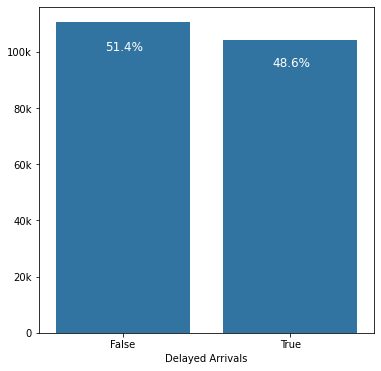

In [91]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[6, 6])

ax = sb.countplot(data=flights_sample, x='ArrDelayed', color=base_color)
plt.xlabel('Delayed Arrivals')
plt.ylabel('')
plt.yticks([0, 2e4, 4e4, 6e4, 8e4, 1e5], ['0', '20k', '40k', '60k', '80k', '100k'])

total = len(flights_sample['ArrDelayed'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2.7
    y = p.get_y() + p.get_height()/1.1
    ax.annotate(percentage, (x, y), size=12, color='white')

plt.show();

From the graph above, we can see that there are slightly more on-time arrivals than delayed ones - 51.4% of all the flights taken were on time! That is a good start. Next, let's check the amount of flights being taken on each day of the week that's on time when arrived.

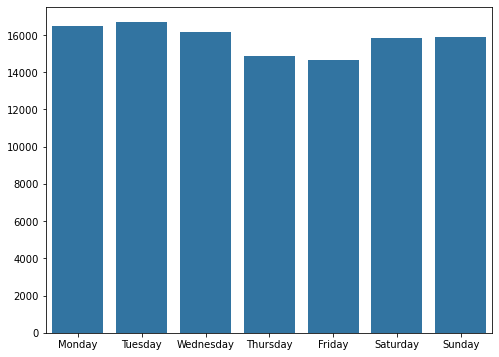

In [115]:
plt.figure(figsize=[8, 6])
ax = sb.countplot(data=flights_sample_ontime, x='DayOfWeek', color=base_color)
plt.xticks(np.arange(0, 7, 1), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('')
plt.ylabel('');

Thursday and Friday have the least amount of on-time flights, while Tuesdays has the most. It is possible that the less flights are being taken on Thursdays and Fridays, and therefore they have the least on-time flights. We can look into it later.

Next up, amount of on-time flights taken during each month of the year.

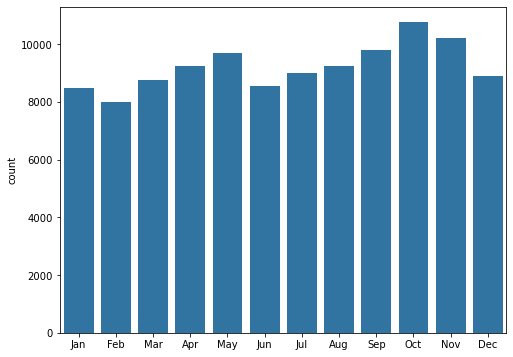

In [31]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample_ontime, x='Month', color=base_color)
plt.xticks(np.arange(0,12,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('');

In [37]:
flights_sample_ontime['Month'].value_counts()

10    10761
11    10221
9      9788
5      9677
8      9255
4      9233
7      8993
12     8887
3      8743
6      8552
1      8492
2      7982
Name: Month, dtype: int64

The graph is roughly binomial with one peak at May and another peak at October. October, being the highest on-time arrival rate month, has about 25% more on-time flighs than February, that is very interesting. Even though the month of October has three more days than February, that is a big difference. 

Next, let's see if there's any good days of a month for on-time flights.

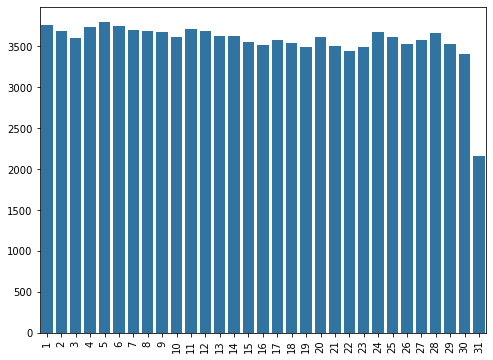

In [126]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample_ontime, x='DayOfMonth', color=base_color)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90);

As expected, 31 of the month has the least amount of on-time arrivals due to 5 out of the 12 months have less than 31 days. 

Now, let's check the on-time arrivals distributions for years 1987 - 2008. 

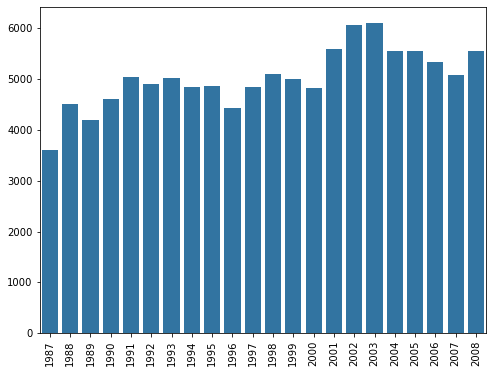

In [125]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample_ontime, x='Year', color=base_color)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90);

The amount of on-time arrivals slowly but steadly going up thoughout the years with a dip in 1996. We can look more into it later.

I am also curious if shorter distance flights get a more reliable arrival. 

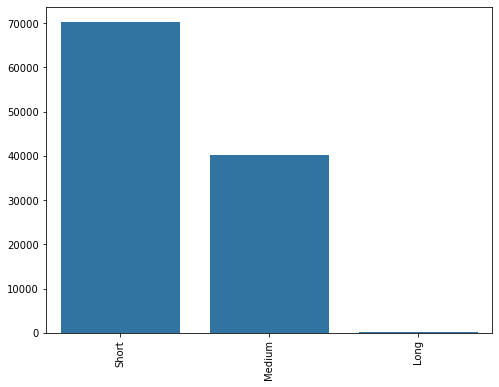

In [149]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample_ontime, x='Haul', color=base_color, order=['Short', 'Medium', 'Long'])
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90);

In [132]:
#plt.figure(figsize=[8, 6])
#sb.countplot(data=flights_sample_ontime, x='Distance', color=base_color)
#plt.xlabel('')
#plt.ylabel('')
#plt.xticks(rotation=90);

Next let's look at how different carriers do.

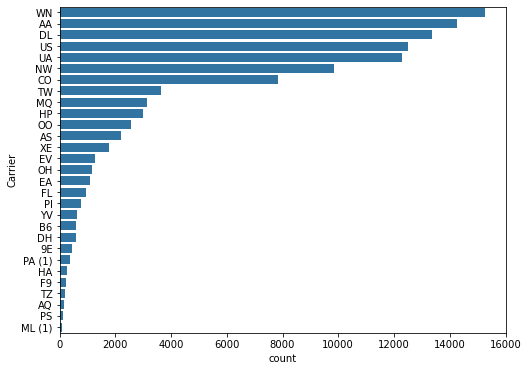

In [32]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample_ontime, y='UniqueCarrier', color=base_color, 
             order=flights_sample_ontime['UniqueCarrier'].value_counts().index)
plt.ylabel('Carrier');

The differences here is very big between WN (Southwest) and ML(1) (Midway), and after performing a Google search, I found out that Midway Airlines has ceased operation in 1991. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

51.4% of all the flights taken between 1987 and 2008 are on time, and over the years it has an increasing rate of on-time arrivals. They are pretty even throughout the week, with a slight less amount on Thursday and Friday. October has the most on-time flights while Feburary has the least. There were no unusal points, therefore no transformations was performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!